# **UCB方策のバンディット**．

---

今回は確率バンディットで**UCB方策**を考えていきます，

UCB方策とは簡潔に説明すると, **選択数が少ないアーム**は**真の報酬の期待値**を予測するのが難しいので少ないアームを優先的に引くために考えられたアルゴリズムです．

----

#### まずはUCB方策の式を見ていきましょう．

$$
\bar u_{i}(t) = \hat u_{i}(t) + \sqrt{\frac{logt}{N_{i}(t)}}
$$

**$\hat u_{i}(t)$** は $t$ 回目までに推定されたアームiの報酬の期待値で, **$N_{i}(t)$** は$t$ 回目までにアームiが選ばれた回数です．

##### この式の意味は**期待値が低いアーム**でも選択回数が低いなら, 積極的に引くということです.

---
#### **早速アルゴリズムに入っていきます．**

In [17]:
import numpy as np
from tqdm import tqdm
#今回はアームが4つの場合を想定します，
class UCB_bandit:
    def __init__(self,rounds: int):
        '''
        N -> armがそれぞれ選ばれた回数
        rewards -> armのそれぞれの総報酬
        '''
        self.p = [0.1, 0.3, 0.5, 0.8] #最適なアームのインデックスは3
        self.N = np.zeros(len(self.p))
        self.rewards = np.zeros(len(self.p))
        self.regrets = np.zeros(rounds)
        self.rounds = rounds
        


    def choose_action(self,N: int,t: int):
        #1回も選ばれてないアームをなくす．
        if t in [0,1,2,3]:
            return t

        rewards = np.zeros(len(self.p))
        for i in range(len(self.p)):
            reward = self.rewards[i]/self.N[i] + 0.01 * np.sqrt(np.log(t) / (2*self.N[i]))
            
            rewards[i] = reward
        max_index = np.where(rewards == rewards.max())
        index = np.random.choice(max_index[0])

    
        return index
            

    def reward(self,index: int):

        return np.random.binomial(1,self.p[index],1)

    
    def update(self,index,reward,round):
        self.rewards[index] += reward
        self.N[index] += 1
        opt_reward = 1.0
        self.regrets[round] = opt_reward - self.rewards[index] / self.N[index]
        

    def simulate(self):
        for i in tqdm(range(self.rounds)):
            arm = self.choose_action(self.N,i)
            
            reward = self.reward(arm)

            self.update(arm,reward,i)

In [18]:
agent = UCB_bandit(rounds=1000)
agent.simulate()
print(f'0が選ばれた回数:{agent.N[0]}回, 1が選ばれた回数:{agent.N[1]}回, 2が選ばれた回数:{agent.N[2]}回, 3が選ばれた回数:{agent.N[3]}回')

100%|██████████| 1000/1000 [00:00<00:00, 11379.69it/s]

0が選ばれた回数:1.0回, 1が選ばれた回数:1.0回, 2が選ばれた回数:1.0回, 3が選ばれた回数:997.0回


Text(0.5, 1.0, 'UCB Regret')

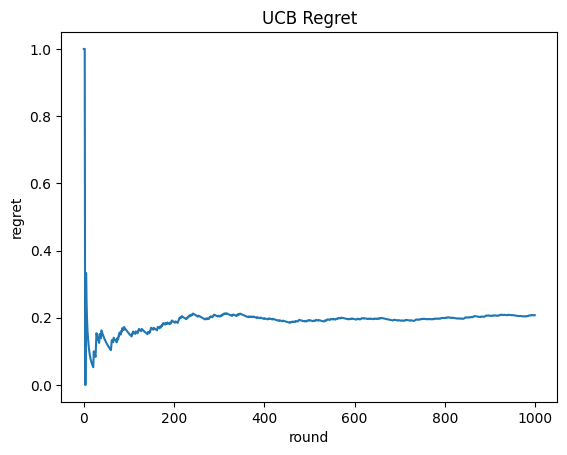

In [21]:
import matplotlib.pyplot as plt

plt.plot(agent.regrets)
plt.xlabel('round')
plt.ylabel('regret')
plt.title('UCB Regret')